In [1]:
import torch
import pandas as pd
from metrics import get_total_metrics
from graphics import get_heatmap, get_differential_heatmap, get_pairs_heatmap, get_combined_mean_variance_heatmap

# Metrics calculating

In [2]:
drug_target_data = pd.read_csv('../analysis/kiba_d_t_aff_smiles_split.csv')

In [3]:
test_data = drug_target_data[drug_target_data['split'] == 2] 
del test_data['split']

In [4]:
test_data

,drug,target,affinity,smiles
94602,CHEMBL2001923,154,11.200000,C1COCCN1C2=CC=C(C=C2)OCCC3=CC4=C(C=C3)NC5=C(C=...
94603,CHEMBL248757,7,12.122734,C1CCOC2=NC(=CN=C2C#N)NC(=O)NC3=CC(=C(C=C3OC1)N...
94604,CHEMBL1993781,177,13.800057,C1=CC=C(C=C1)COCC(COC2=CN=CC(=C2)C=CC3=CC=NC=C3)N
94605,CHEMBL1998585,168,11.200000,C1=CC(=CC=C1C2=CSC3=NC=NC(=C23)N)NC(=O)NC4=C(C...
94606,CHEMBL2005528,141,11.600000,CCOC(=O)C1=CC2=C(C=C1)NC3=C2CCNC3=O
...,...,...,...,...
118249,CHEMBL2006765,45,11.699999,CCCNC(=O)C1=CC=C(C=C1)NC2=NC3=C(C=CN3)C(=N2)NC...
118250,CHEMBL1982874,107,11.999998,C1CC1CN2C3=C(C=CC(=C3)C4=C(N=C5N4C=CS5)C6=CC=C...
118251,CHEMBL1985042,15,10.400000,CC1=CC(=O)NC2=C1C(=O)N(N2)C3=CC=CC=C3
118252,CHEMBL1982466,165,12.399998,CC1=CC=C(C=C1)NC(=O)NC2=CC=C(C=C2)C3=CSC4=C3C(...


In [5]:
DTI_KIBA_tl_nf_d_enc_BDB_best = torch.load('../analysis/DTI_KIBA_tl_nf_d_enc_BDB_best_2904')

In [6]:
test_data.insert(4, 'predicted', DTI_KIBA_tl_nf_d_enc_BDB_best)
test_data

,drug,target,affinity,smiles,predicted
94602,CHEMBL2001923,154,11.200000,C1COCCN1C2=CC=C(C=C2)OCCC3=CC4=C(C=C3)NC5=C(C=...,11.257645
94603,CHEMBL248757,7,12.122734,C1CCOC2=NC(=CN=C2C#N)NC(=O)NC3=CC(=C(C=C3OC1)N...,11.927255
94604,CHEMBL1993781,177,13.800057,C1=CC=C(C=C1)COCC(COC2=CN=CC(=C2)C=CC3=CC=NC=C3)N,11.854552
94605,CHEMBL1998585,168,11.200000,C1=CC(=CC=C1C2=CSC3=NC=NC(=C23)N)NC(=O)NC4=C(C...,11.291764
94606,CHEMBL2005528,141,11.600000,CCOC(=O)C1=CC2=C(C=C1)NC3=C2CCNC3=O,11.638812
...,...,...,...,...,...
118249,CHEMBL2006765,45,11.699999,CCCNC(=O)C1=CC=C(C=C1)NC2=NC3=C(C=CN3)C(=N2)NC...,12.454696
118250,CHEMBL1982874,107,11.999998,C1CC1CN2C3=C(C=CC(=C3)C4=C(N=C5N4C=CS5)C6=CC=C...,12.001260
118251,CHEMBL1985042,15,10.400000,CC1=CC(=O)NC2=C1C(=O)N(N2)C3=CC=CC=C3,10.437726
118252,CHEMBL1982466,165,12.399998,CC1=CC=C(C=C1)NC(=O)NC2=CC=C(C=C2)C3=CSC4=C3C(...,13.165305


In [ ]:
test_data.columns = ['drug', 'target', 'affinity', 'SMILES', 'predicted']
test_data

In [7]:
test_data.to_csv('../analysis/DTI_KIBA_tl_nf_d_enc_BDB_best_2904_preds.csv', index=False)

In [8]:
#preds = pd.read_csv('../analysis/DTI_tl_best1_nw_2404_preds.csv')
preds = test_data

In [9]:
preds

,drug,target,affinity,smiles,predicted
94602,CHEMBL2001923,154,11.200000,C1COCCN1C2=CC=C(C=C2)OCCC3=CC4=C(C=C3)NC5=C(C=...,11.257645
94603,CHEMBL248757,7,12.122734,C1CCOC2=NC(=CN=C2C#N)NC(=O)NC3=CC(=C(C=C3OC1)N...,11.927255
94604,CHEMBL1993781,177,13.800057,C1=CC=C(C=C1)COCC(COC2=CN=CC(=C2)C=CC3=CC=NC=C3)N,11.854552
94605,CHEMBL1998585,168,11.200000,C1=CC(=CC=C1C2=CSC3=NC=NC(=C23)N)NC(=O)NC4=C(C...,11.291764
94606,CHEMBL2005528,141,11.600000,CCOC(=O)C1=CC2=C(C=C1)NC3=C2CCNC3=O,11.638812
...,...,...,...,...,...
118249,CHEMBL2006765,45,11.699999,CCCNC(=O)C1=CC=C(C=C1)NC2=NC3=C(C=CN3)C(=N2)NC...,12.454696
118250,CHEMBL1982874,107,11.999998,C1CC1CN2C3=C(C=CC(=C3)C4=C(N=C5N4C=CS5)C6=CC=C...,12.001260
118251,CHEMBL1985042,15,10.400000,CC1=CC(=O)NC2=C1C(=O)N(N2)C3=CC=CC=C3,10.437726
118252,CHEMBL1982466,165,12.399998,CC1=CC=C(C=C1)NC(=O)NC2=CC=C(C=C2)C3=CSC4=C3C(...,13.165305


In [10]:
results = get_total_metrics(preds, threshold_affinity=[0, 1, 1.5, 2, 2.5, 3, 3.5, 4], threshold_similarity=[0, 0.1, 0.3, 0.5, 0.7, 0.9])

100%|██████████| 3/3 [00:00<00:00, 41943.04it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 17623.13it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 17772.47it/s]
/home/stsouko/Documents/Regina_files/git/AC-DTI/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/stsouko/Documents/Regina_files/git/AC-DTI/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/stsouko/Documents/Regina_files/git/AC-DTI/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/stsouko/Documents/Regina_files/git/AC-DTI/venv/lib/python3.10/site-pack

No data available for threshold_affinity=4 and threshold_similarity=0.9


In [11]:
results.to_csv('../analysis/DTI_KIBA_tl_nf_d_enc_BDB_best_2904_metrics.csv', index=False)
results

,threshold_affinity,threshold_similarity,number_of_pairs,r2_micro,rmse_micro,r2_macro,rmse_macro
0,0.0,0.0,1265317,0.606933,0.597667,-7.104113e+00,0.579710
1,0.0,0.1,1265303,0.606929,0.597670,-7.104113e+00,0.579711
2,0.0,0.3,1243018,0.602159,0.599915,-7.105705e+00,0.580684
3,0.0,0.5,309931,0.577500,0.607534,-1.063384e+01,0.576232
4,0.0,0.7,15040,0.675855,0.594820,7.385372e-02,0.550623
5,0.0,0.9,1710,0.677546,0.615939,-4.494418e-01,0.507828
6,1.0,0.0,482448,0.589602,0.810019,2.616664e-01,0.786230
7,1.0,0.1,482447,0.589602,0.810019,2.616664e-01,0.786230
8,1.0,0.3,473223,0.584161,0.813784,2.591865e-01,0.788185
9,1.0,0.5,112468,0.541475,0.827856,-5.358639e-01,0.799496


# Heatmaps

In [ ]:
get_pairs_heatmap(results, 'DTI')

In [12]:
results_best_overall = pd.read_csv('../analysis/DTI_vary_all_train_best_1404_metrics.csv')

In [ ]:
results_best1_w = pd.read_csv('../analysis/DTI_tl_best1_w_2404_metrics-1.csv')

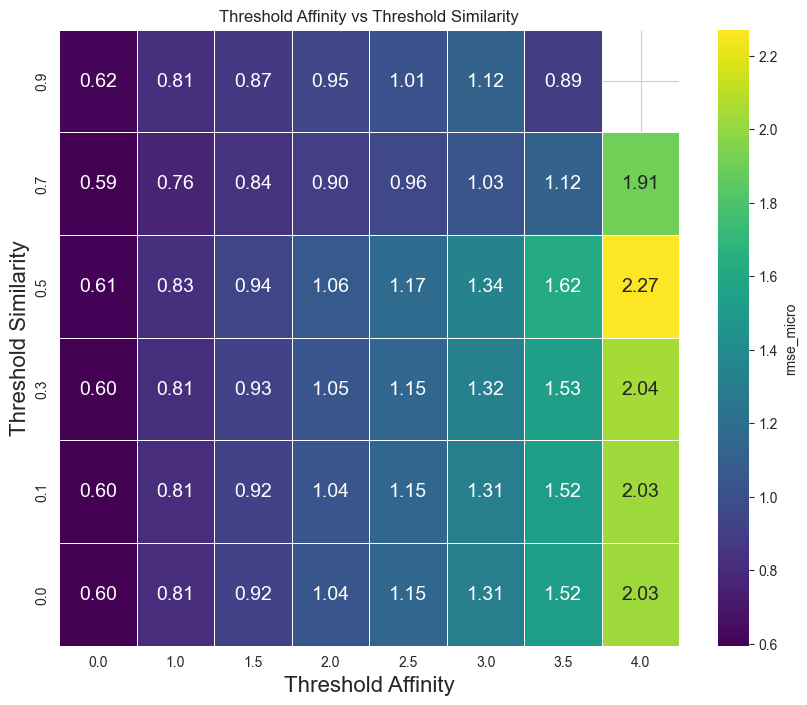

In [15]:
get_heatmap(results, 'rmse_micro', model_name='DTI_KIBA_tl_nf_d_enc_BDB_best')

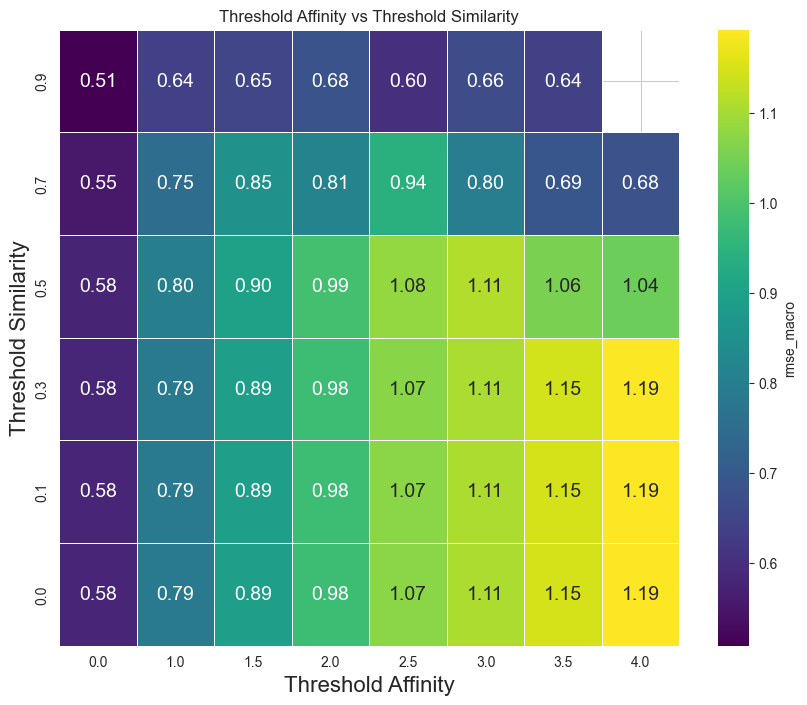

In [17]:
get_heatmap(results, 'rmse_macro', model_name='DTI_KIBA_tl_nf_d_enc_BDB_best')

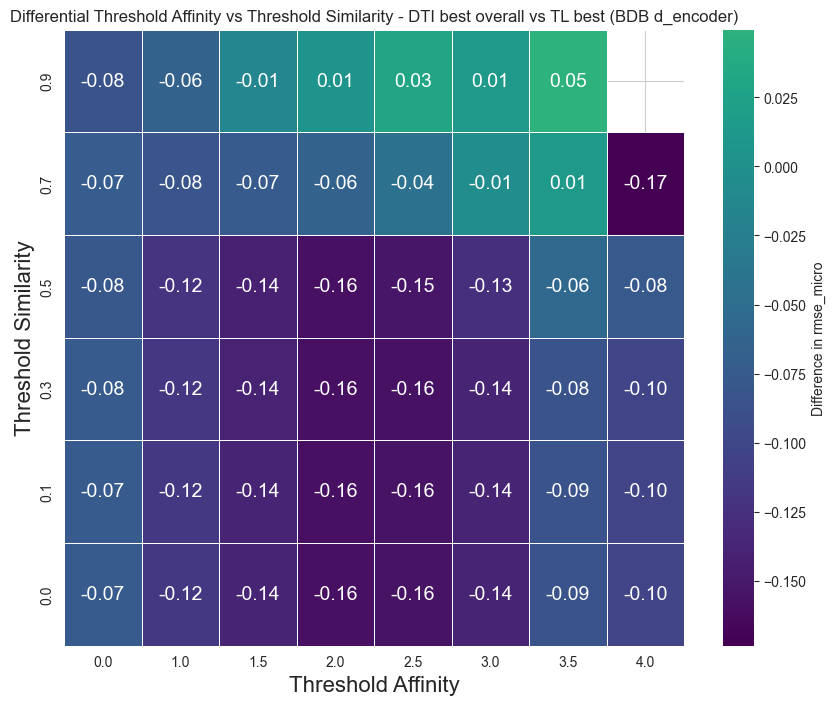

In [14]:
get_differential_heatmap(results_best_overall, results, 'rmse_micro', 'DTI best overall vs TL best (BDB d_encoder)')

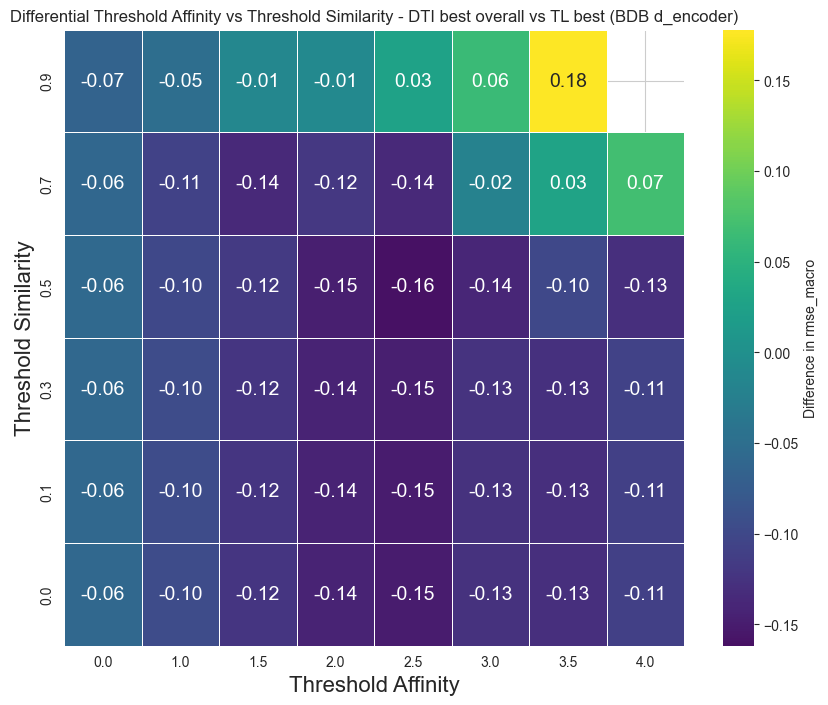

In [13]:
get_differential_heatmap(results_best_overall, results, 'rmse_macro', 'DTI best overall vs TL best (BDB d_encoder)')

# Flipped version

In [ ]:
pred_DTI_best_vary_all = pd.read_csv('../analysis/DTI_vary_all_train_best_1404_metrics.csv')
pred_DTI_best_vary_all_wTL = pd.read_csv('../analysis/DTI_best_vary_all_wTL_2404_metrics.csv')

In [ ]:
get_heatmap(pred_DTI_best_vary_all, 'rmse_micro', model_name='DTI_best_vary_all_train')

In [ ]:
get_heatmap(pred_DTI_best_vary_all, 'rmse_macro', model_name='DTI_best_vary_all_train')

In [ ]:
get_heatmap(pred_DTI_best_vary_all_wTL, 'rmse_micro', model_name='DTI_best_vary_all_TL')

In [ ]:
get_heatmap(pred_DTI_best_vary_all_wTL, 'rmse_macro', model_name='DTI_best_vary_all_TL')

In [ ]:
get_differential_heatmap(pred_DTI_best_vary_all, pred_DTI_best_vary_all_wTL, 'rmse_micro', 'DTI best configuration train from scratch vs TL')

In [ ]:
get_differential_heatmap(pred_DTI_best_vary_all, pred_DTI_best_vary_all_wTL, 'rmse_macro', 'DTI best configuration train from scratch vs TL')

In [ ]:
get_differential_heatmap(pred_DTI_best_vary_all, pred_DTI_best_vary_all_wTL, 'rmse_micro', 'DTI best configuration train from scratch vs TL')

# Transfer learning

In [ ]:
results_best_overall = pd.read_csv('../analysis/DTI_vary_all_train_best_1404_metrics.csv')

In [ ]:
results_nf = pd.read_csv('../analysis/DTI_tl_nf_train_best_1504_metrics.csv')
results_f = pd.read_csv('../analysis/DTI_tl_f_train_best_1504_metrics.csv')
results_f_el = pd.read_csv('../analysis/DTI_tl_f_add_l_to_d_enc_train_best_1604_metrics.csv')

In [ ]:
get_heatmap(results_best_overall, 'rmse_micro', model_name='DTI_best_vary_all_train')

In [ ]:
get_heatmap(results_best_overall, 'rmse_macro', model_name='DTI_best_vary_all_train')

In [ ]:
get_heatmap(results_nf, 'rmse_macro', model_name='DTI_best_TL_ws')

In [ ]:
get_heatmap(results_nf, 'rmse_micro', model_name='DTI_best_TL_ws')

In [ ]:
get_differential_heatmap(results_best_overall, results_nf, 'rmse_macro', 'DTI best configuration train from scratch vs TL')

# Top 10 transfer learning

In [ ]:
results_best_overall = pd.read_csv('../analysis/DTI_vary_all_train_best_1404_metrics.csv')

In [ ]:
results_best1_nw = pd.read_csv('../analysis/DTI_tl_best1_nw_2404_metrics-1.csv')
results_best1_w = pd.read_csv('../analysis/DTI_tl_best1_w_2404_metrics-1.csv')
results_best2_nw = pd.read_csv('../analysis/DTI_tl_best2_nw_2404_metrics.csv')
results_best2_w = pd.read_csv('../analysis/DTI_tl_best2_w_2404_metrics.csv')
results_best3_nw = pd.read_csv('../analysis/DTI_tl_best3_nw_2404_metrics.csv')
results_best3_w = pd.read_csv('../analysis/DTI_tl_best3_w_2404_metrics.csv')
results_best4_nw = pd.read_csv('../analysis/DTI_tl_best4_nw_2404_metrics.csv')
results_best4_w = pd.read_csv('../analysis/DTI_tl_best4_w_2404_metrics.csv')
results_best5_nw = pd.read_csv('../analysis/DTI_tl_best5_nw_2404_metrics.csv')
results_best5_w = pd.read_csv('../analysis/DTI_tl_best5_w_2404_metrics.csv')
results_best6_nw = pd.read_csv('../analysis/DTI_tl_best6_nw_2404_metrics.csv')
results_best6_w = pd.read_csv('../analysis/DTI_tl_best6_w_2404_metrics.csv')
results_best7_nw = pd.read_csv('../analysis/DTI_tl_best7_nw_2404_metrics.csv')
results_best7_w = pd.read_csv('../analysis/DTI_tl_best7_w_2404_metrics.csv')
results_best8_nw = pd.read_csv('../analysis/DTI_tl_best8_nw_2404_metrics.csv')
results_best8_w = pd.read_csv('../analysis/DTI_tl_best8_w_2404_metrics.csv')
results_best9_nw = pd.read_csv('../analysis/DTI_tl_best9_nw_2404_metrics.csv')
results_best9_w = pd.read_csv('../analysis/DTI_tl_best9_w_2404_metrics.csv')
results_best10_nw = pd.read_csv('../analysis/DTI_tl_best10_nw_2404_metrics.csv')
results_best10_w = pd.read_csv('../analysis/DTI_tl_best10_w_2404_metrics.csv')

In [ ]:
get_differential_heatmap(results_best_overall, results_nf, 'rmse_micro', 'DTI best configuration train from scratch vs TL (warm started)')

In [ ]:
get_combined_mean_variance_heatmap([results_best1_nw, results_best2_nw, results_best3_nw, results_best4_nw, results_best5_nw,  
                                       results_best6_nw, results_best7_nw, results_best8_nw, results_best9_nw, results_best10_nw], 
                                      [results_best1_w, results_best2_w, results_best3_w, results_best4_w, results_best5_w, 
                                       results_best6_w, results_best7_w, results_best8_w, results_best9_w, results_best10_w], 
                                      'rmse_micro', 'top10 TL best models: with and without weights')